In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The data

In [3]:
#Pc load data
df_species = pd.read_csv("F:\Codecademy\Exercises\Biodiversity\species_info.csv")

#Mac load data
#df_species = pd.read_csv("/Users/administrador/Documents/Codeacademy/Biodiversity/species_info.csv")

df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


Verificar e limpar nomes duplicados.
scientific_name só pode ser úcnio, portanto, vamos analisá-lo: 

In [4]:

df_species[df_species.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [5]:
df_species[df_species.scientific_name == "Canis lupus"]

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [6]:
df_species.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)
df_species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  179 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


Now, let´s do the same for observations

In [7]:
df_observations = pd.read_csv("F:\Codecademy\Exercises\Biodiversity\observations.csv")

#Load data on mac
#df_obs = pd.read_csv("/Users/administrador/Documents/Codeacademy/Biodiversity/observations.csv")
df_observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [8]:
df_observations.describe(include="all")

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Holcus lanatus,Yellowstone National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [9]:
df_observations[df_observations.duplicated(subset=["scientific_name", "park_name"])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [10]:
df_observations[df_observations.scientific_name == "Microtus longicaudus"]	

,scientific_name,park_name,observations
1092,Microtus longicaudus,Yellowstone National Park,218
7124,Microtus longicaudus,Bryce National Park,79
7512,Microtus longicaudus,Great Smoky Mountains National Park,121
15949,Microtus longicaudus,Yosemite National Park,117
17858,Microtus longicaudus,Yosemite National Park,130
18360,Microtus longicaudus,Bryce National Park,135
19277,Microtus longicaudus,Great Smoky Mountains National Park,91
23258,Microtus longicaudus,Yellowstone National Park,244


The same scientific_name appers in different park_name's.


In [11]:
df_observations.drop_duplicates(subset=["scientific_name", "park_name"], keep='last', inplace=True)
df_observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


In [12]:
df_observations.describe(include="all")

,scientific_name,park_name,observations
count,22164,22164,22164.000000
unique,5541,4,NaN
top,Melospiza melodia,Yellowstone National Park,NaN
freq,4,5541,NaN
mean,NaN,NaN,142.310729
std,NaN,NaN,69.876644
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,196.000000


## The Analysis

In [13]:
#merge the dataframes
observation_data = pd.merge(df_observations, df_species, left_on='scientific_name', right_on='scientific_name', how='left')

In [14]:
observation_data.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN


In [15]:
observation_data.describe(include="all")

,scientific_name,park_name,observations,category,common_names,conservation_status
count,22164,22164,22164.000000,22164,22164,716
unique,5541,4,NaN,7,5231,4
top,Melospiza melodia,Yellowstone National Park,NaN,Vascular Plant,Brachythecium Moss,Species of Concern
freq,4,5541,NaN,17048,28,604
mean,NaN,NaN,142.310729,NaN,NaN,NaN
std,NaN,NaN,69.876644,NaN,NaN,NaN
min,NaN,NaN,9.000000,NaN,NaN,NaN
25%,NaN,NaN,86.000000,NaN,NaN,NaN
50%,NaN,NaN,124.000000,NaN,NaN,NaN
75%,NaN,NaN,196.000000,NaN,NaN,NaN


In [16]:
observation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      22164 non-null  object
 1   park_name            22164 non-null  object
 2   observations         22164 non-null  int64 
 3   category             22164 non-null  object
 4   common_names         22164 non-null  object
 5   conservation_status  716 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


### 1. What is the distribution of conservation_status for animals?

In [17]:
#criar um novo df (exceto as que não estão no reino animal)
plants_cat = ['Vascular Plant', 'Nonvascular Plant']
animals = observation_data[observation_data.category.isin(plants_cat) == False]

In [18]:
animals.describe(include="all")

,scientific_name,park_name,observations,category,common_names,conservation_status
count,3784,3784,3784.000000,3784,3784,512
unique,946,4,NaN,5,896,4
top,Glaucomys volans,Bryce National Park,NaN,Bird,Brewster's Warbler,Species of Concern
freq,4,946,NaN,1952,12,412
mean,NaN,NaN,139.418340,NaN,NaN,NaN
std,NaN,NaN,70.153735,NaN,NaN,NaN
min,NaN,NaN,11.000000,NaN,NaN,NaN
25%,NaN,NaN,84.000000,NaN,NaN,NaN
50%,NaN,NaN,121.000000,NaN,NaN,NaN
75%,NaN,NaN,189.000000,NaN,NaN,NaN


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Amphibian'),
  Text(3, 0, 'Reptile'),
  Text(4, 0, 'Fish')])

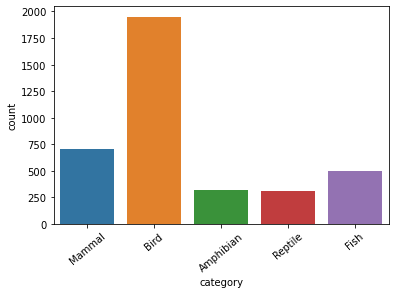

In [19]:
sns.countplot(data=animals, x='category')
plt.xticks(rotation=40)

Entre os animais, Birds ocupam a primeira posição em relação ao número de seres.
Seguido por Mammal e Fish.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Amphibian'),
  Text(3, 0, 'Reptile'),
  Text(4, 0, 'Fish')])

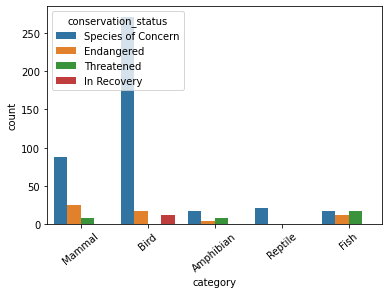

In [20]:
sns.countplot(data=animals, x='category', hue="conservation_status")
plt.xticks(rotation=40)

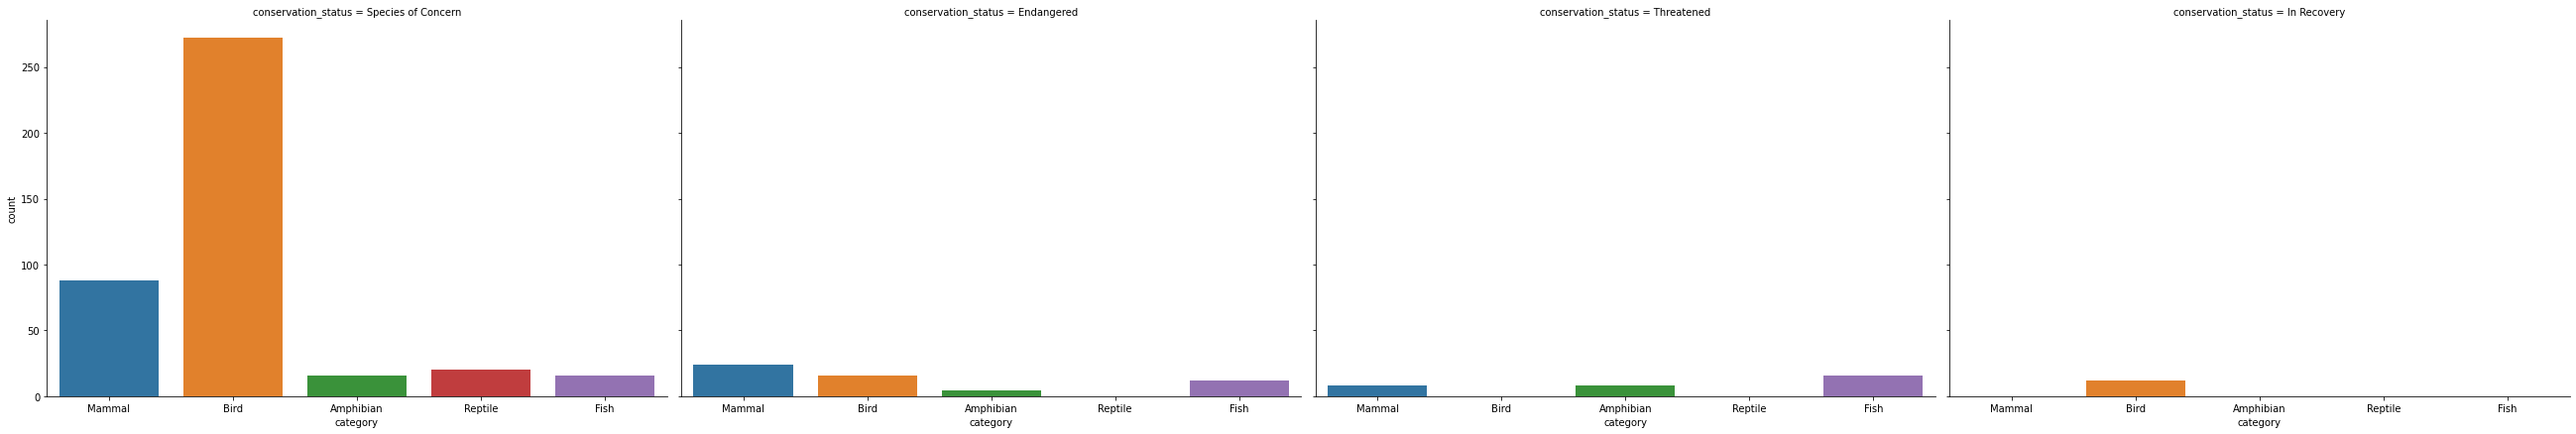

In [21]:
employ_fig = sns.catplot(data=animals,
kind="count",
x="category", col="conservation_status",
aspect=1.5,
height=6)

### 2. Are certain types of species more likely to be endangered?


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Vascular Plant'),
  Text(1, 0, 'Mammal'),
  Text(2, 0, 'Bird'),
  Text(3, 0, 'Nonvascular Plant'),
  Text(4, 0, 'Amphibian'),
  Text(5, 0, 'Reptile'),
  Text(6, 0, 'Fish')])

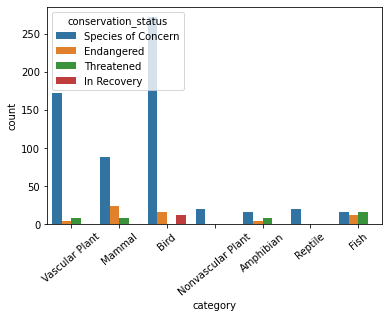

In [22]:
sns.countplot(data=observation_data, x='category', hue="conservation_status")
plt.xticks(rotation=40)

In [26]:
species_cons = observation_data.groupby(["conservation_status", "category"]).observations.sum().reset_index()


<AxesSubplot:xlabel='conservation_status', ylabel='count'>

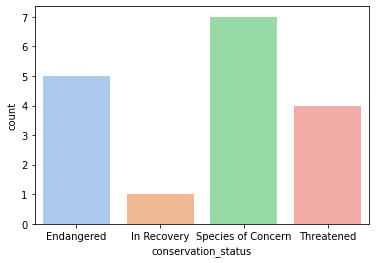

In [34]:
sns.countplot(x="conservation_status", data=species_cons, palette="pastel")

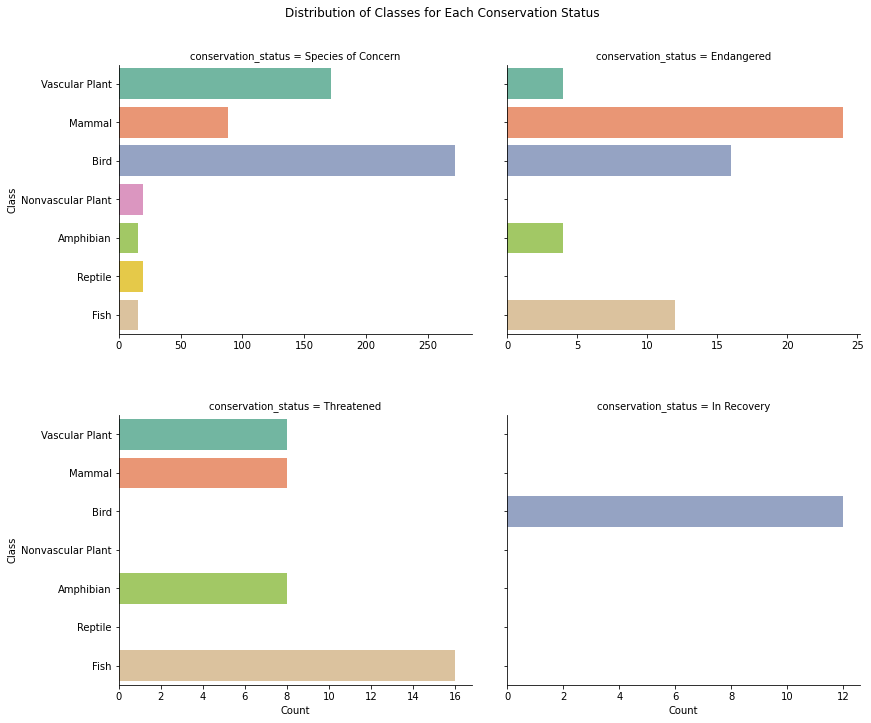

<Figure size 432x288 with 0 Axes>

In [24]:
cons_status = sns.catplot(data = observation_data, kind = 'count',
                      y = 'category', 
                      col = 'conservation_status', col_wrap = 2, sharex = False,
                      palette = 'Set2', height = 5, aspect = 1.2)

cons_status.set_axis_labels('Count', 'Class')
cons_status.fig.subplots_adjust(top = 0.9, hspace = 0.3, wspace = 0.1)
cons_status.fig.suptitle('Distribution of Classes for Each Conservation Status')

plt.show()
plt.clf()

The species with most engendered ocorrences:
Mammal
Bird
Fish

Yellowstone National Park possui o maior número de espécies observadas.

In [25]:
#median of observed species per park

print("Median observations per park: ")
df_obs[["observations", "park_name"]].groupby("park_name").median()

Median observations per park: 


NameError: name 'df_obs' is not defined

In [ ]:
df_obs[["scientific_name", "observations"]].groupby("scientific_name").count()

,observations
scientific_name,
Abies bifolia,4
Abies concolor,4
Abies fraseri,4
Abietinella abietina,4
Abronia ammophila,4
...,...
Zonotrichia leucophrys gambelii,4
Zonotrichia leucophrys oriantha,4
Zonotrichia querula,4


Vamos analisar o dataframe sobre as espécies.

In [ ]:
max_rows = df_species["scientific_name"].count()
print("% Missing data: ")
print((1 - df_species.count() / max_rows)* 100)


% Missing data: 
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64


conservation_status tem um número muito elevado de missing data.
Precisamos investigar isso melhor

In [ ]:
df_species[["conservation_status", "category"]].groupby("category").count()

,conservation_status
category,
Amphibian,7
Bird,79
Fish,11
Mammal,38
Nonvascular Plant,5
Reptile,5
Vascular Plant,46


In [ ]:
df_species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Reptile'),
  Text(3, 0, 'Amphibian'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Vascular Plant'),
  Text(6, 0, 'Nonvascular Plant')])

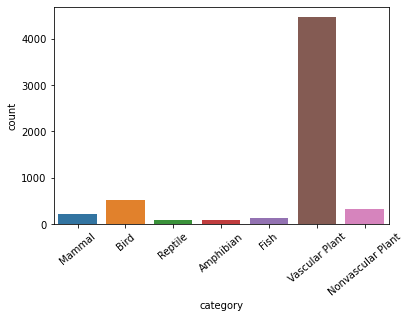

In [ ]:
#para entender o tamanho de cada categoria de modo visual
sns.countplot(data=df_species, x='category')
plt.xticks(rotation=40)

Qual categoria possui o maior número de missing data?
Vamos isolar estes dados para avaliá-los.

            category  conservation_status
0          Amphibian                   73
1               Bird                  442
2               Fish                  116
3             Mammal                  176
4  Nonvascular Plant                  328
5            Reptile                   74
6     Vascular Plant                 4424


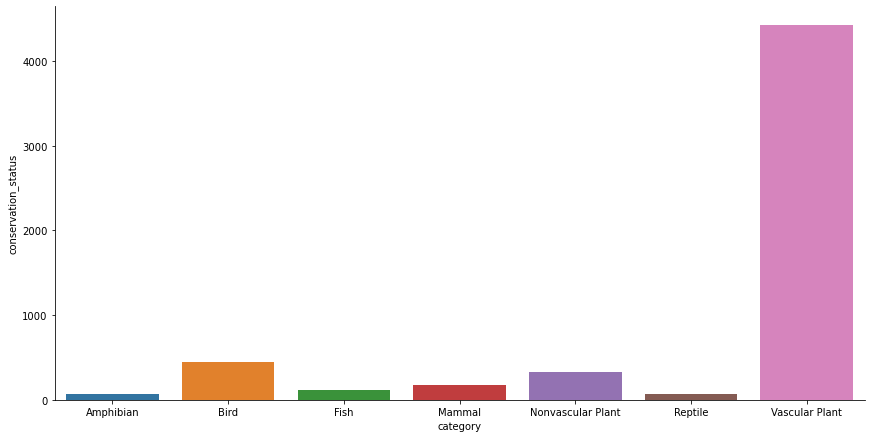

In [ ]:
#missing data analysis
md_species = df_species[["conservation_status"]].isnull().groupby(df_species["category"]).sum().reset_index()
print(md_species)

B = sns.catplot(data=md_species,
kind="bar",
x="category", y="conservation_status",
aspect=2,
height=6
)

Vascular Plant is the category with most missing data in dataframe: 4424

In [ ]:
print(df_species["conservation_status"].head(10))

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
5                   NaN
6                   NaN
7    Species of Concern
8            Endangered
9            Endangered
Name: conservation_status, dtype: object


<AxesSubplot:xlabel='conservation_status', ylabel='count'>

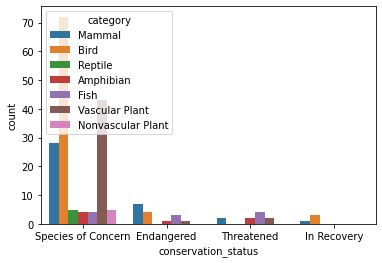

In [ ]:
sns.countplot(data=df_species, x="conservation_status", hue="category")

In [ ]:
#calculate the proportion in each category
df_species.conservation_status.value_counts(normalize = True, ascending=True)

In Recovery           0.020942
Threatened            0.052356
Endangered            0.083770
Species of Concern    0.842932
Name: conservation_status, dtype: float64

Mais de 84% são de espécies em extinção.

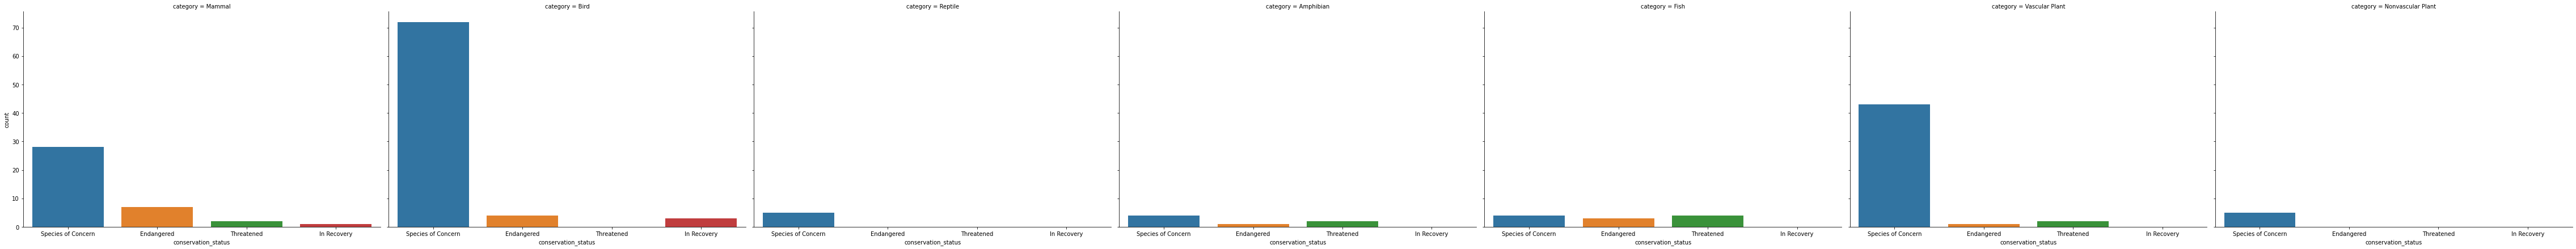

In [ ]:
employ_fig = sns.catplot(data=df_species,
kind="count",
x="conservation_status", col="category",
aspect=1.5,
height=6)

In [ ]:
#vamos analisar missing data de melhor quantidade: Amphibian
amphibian_cat = df_species[df_species.category == "Amphibian"]
print(amphibian_cat.head())



      category             scientific_name                     common_names  \
411  Amphibian  Bufo americanus americanus            Eastern American Toad   
412  Amphibian                Bufo fowleri  Fowler's Toad, Woodhouse's Toad   
413  Amphibian   Acris crepitans crepitans            Northern Cricket Frog   
414  Amphibian           Hyla chrysoscelis             Cope's Gray Treefrog   
415  Amphibian             Hyla versicolor                    Gray Treefrog   

    conservation_status  
411                 NaN  
412                 NaN  
413                 NaN  
414                 NaN  
415                 NaN  


In [ ]:
amphibian_cat['conservation_status'].isna().sum()

73

Vamos trabalhar com os dados sem NaN, pois são muitos.
Assim podemos avaliar realmente o número de espécies em extinção, com uma base super reduzida.

In [ ]:
#selecionar rows que não possuem NaN como valor
df_species_clean = df_species[~df_species['conservation_status'].isna()]

In [ ]:
print(df_species_clean.head())

   category            scientific_name       common_names conservation_status
7    Mammal              Canis latrans             Coyote  Species of Concern
8    Mammal                Canis lupus          Gray Wolf          Endangered
9    Mammal                Canis rufus           Red Wolf          Endangered
29   Mammal           Eptesicus fuscus      Big Brown Bat  Species of Concern
30   Mammal  Lasionycteris noctivagans  Silver-Haired Bat  Species of Concern


In [ ]:
df_species_clean.describe(include="all")

,category,scientific_name,common_names,conservation_status
count,191,191,191,191
unique,7,179,190,4
top,Bird,Myotis lucifugus,"Gray Wolf, Wolf",Species of Concern
freq,79,3,2,161


In [ ]:
df_species_clean.conservation_status.value_counts(normalize = True, ascending=True)

In Recovery           0.020942
Threatened            0.052356
Endangered            0.083770
Species of Concern    0.842932
Name: conservation_status, dtype: float64

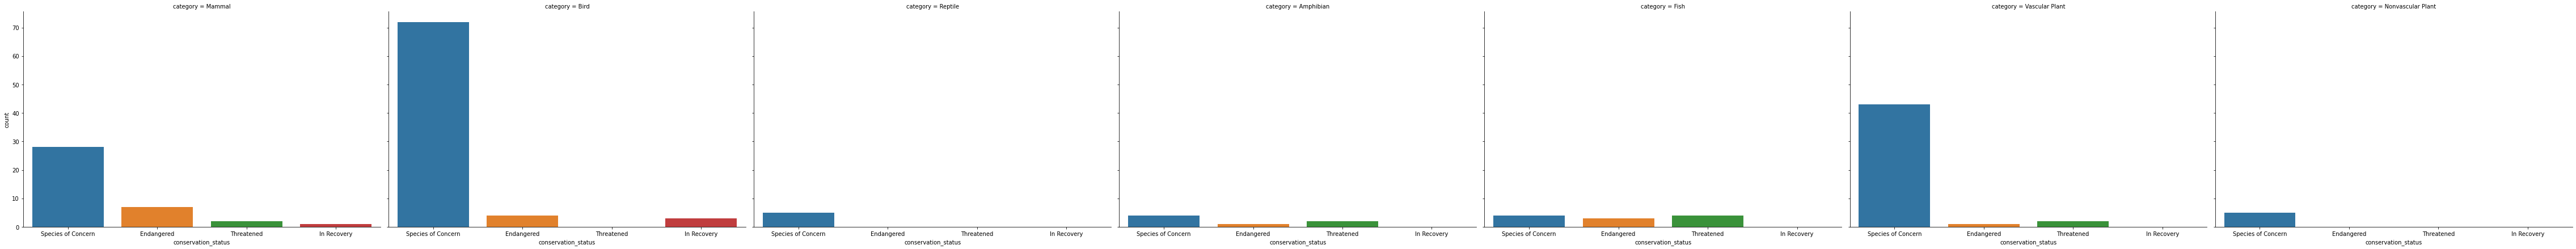

In [ ]:
employ_fig = sns.catplot(data=df_species_clean,
kind="count",
x="conservation_status", col="category",
aspect=1.5,
height=6)

Será que houve grande mudança na amostra por categoria?
Sim, na nova amostragem, os Birds são maioria. Seguido por Vascular Plants e Mammal.


<AxesSubplot:xlabel='category', ylabel='count'>

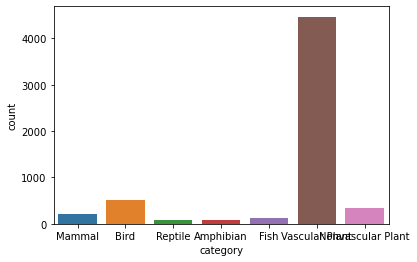

In [ ]:
sns.countplot(data=df_species, x="category")

<AxesSubplot:xlabel='category', ylabel='count'>

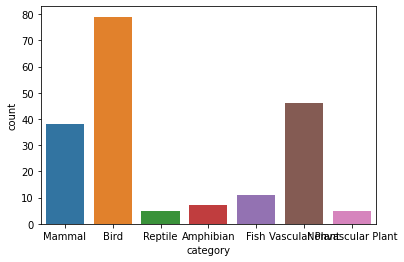

In [ ]:
sns.countplot(data=df_species_clean, x="category")

O missing data têm alguma relação com outros valores?

In [ ]:
#separar somente os que tem NaN como resultado para conservation_status

df_species_nan = df_species[df_species['conservation_status'].isna()]
df_species_nan.describe()

,category,scientific_name,common_names,conservation_status
count,5633,5633,5633,0
unique,7,5363,5324,0
top,Vascular Plant,Hypochaeris radicata,Dicranum Moss,NaN
freq,4424,3,7,NaN


In [ ]:
print(df_species_nan.head(10))

   category                scientific_name  \
0    Mammal  Clethrionomys gapperi gapperi   
1    Mammal                      Bos bison   
2    Mammal                     Bos taurus   
3    Mammal                     Ovis aries   
4    Mammal                 Cervus elaphus   
5    Mammal         Odocoileus virginianus   
6    Mammal                     Sus scrofa   
10   Mammal       Urocyon cinereoargenteus   
11   Mammal                   Vulpes fulva   
12   Mammal                  Vulpes vulpes   

                                         common_names conservation_status  
0                            Gapper's Red-Backed Vole                 NaN  
1                               American Bison, Bison                 NaN  
2   Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                       Wapiti Or Elk                 NaN  
5                                   W

What`s the conversation_status for animals?


In [ ]:
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [ ]:
df_species.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5819    False
5820    False
5821    False
5822    False
5823    False
Length: 5824, dtype: bool